## Analysing Family Netflix Data

### Importing Libraries

In [2]:
## Importing libraries ##

# Data processing
import pandas as pd

# Numerical manipulation
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [3]:
# Reading the private csv file
df = pd.read_csv('AnonymisedViewingActivity.csv')

## Names have been replaced for anonymity ##

# Previewing the data
print('Number of datapoints: ', len(df))
df.sample(5)

Number of datapoints:  7995


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
4184,Cathy,2022-10-03 18:21:27,00:26:39,NaN,Big Mouth: Season 5: Best Friends Make the Bes...,NaN,Netflix Opera Other,00:26:45,00:26:45,GB (United Kingdom)
5486,Cathy,2015-11-04 19:33:30,00:15:45,NaN,Blue Exorcist: Season 1: Gehenna Gate (Episode 2),NaN,Chrome PC (Cadmium),00:19:20,Not latest view,GB (United Kingdom)
7120,Emile,2020-01-06 15:00:20,01:35:17,NaN,Non-Stop,NaN,Netflix Chrome MAC (Cadmium) HTML 5,01:35:57,Not latest view,GB (United Kingdom)
6280,Emile,2021-10-12 22:05:56,00:40:41,NaN,Maid: Limited Series: Dollar Store (Episode 1),NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:47:25,00:47:25,GB (United Kingdom)
1085,Aaron,2019-05-05 22:22:23,00:27:32,NaN,Dead to Me: Season 1: I Have to Be Honest (Epi...,NaN,Youview British Telecom DTR-T2100 Set Top Box,00:27:36,00:27:36,GB (United Kingdom)


### About the Data

**User Information**
1. Profile Name
2. Device Type
3. Country

> Information describing the user and their circumstances

**Watch Information**
1. Start Time
2. Duration
3. Title
4. Supplemental Video Type

> Data specific to watch

**Session Information**
1. Attributes
2. Latest Bookmark

> Technical circumstances of the viewing session

In [145]:
# Understanding what we need to clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             7995 non-null   object
 1   Start Time               7995 non-null   object
 2   Duration                 7995 non-null   object
 3   Attributes               1816 non-null   object
 4   Title                    7995 non-null   object
 5   Supplemental Video Type  1458 non-null   object
 6   Device Type              7995 non-null   object
 7   Bookmark                 7995 non-null   object
 8   Latest Bookmark          7995 non-null   object
 9   Country                  7995 non-null   object
dtypes: object(10)
memory usage: 624.7+ KB


**Things to note from df.info():**
- Attributes and Supplemental Video Type are mostly null (NA) values
- Start Time, Duration, Bookmark and Latest Bookmark are all parsed as strings despite being otherwise
- The Title series contains inconsistently formatted entries (some spaces, some underscores, etc.) 

### Cleaning the Data

Begin by making series titles a little easier to work with and issuing the correct data types for Start Time, Duration, Bookmark and Latest Bookmark.

In [146]:
# Cleaning series titles
df.columns = df.columns.str.replace(' ', '_')

In [147]:
# Parsing Start Time, Duration, Bookmark and Latest Bookmark appropriately

# Start_Time is in datetime format, hence use pd.to_datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], utc=True)

# Remaining numerical values can be described as time deltas (differences in times)
TimeDeltas = ['Duration', 'Bookmark', 'Latest_Bookmark']
for i in TimeDeltas:
    df[i] = pd.to_timedelta(df[i], errors='coerce')

# Checking series types
df.dtypes


Profile_Name                            object
Start_Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental_Video_Type                 object
Device_Type                             object
Bookmark                       timedelta64[ns]
Latest_Bookmark                timedelta64[ns]
Country                                 object
dtype: object

Having assigned appropriate data types we can now focus on making the object-type contents easier to work with.

In [148]:
# Cleaning string contents
for i in list(df.dtypes[df.dtypes == 'object'].index):
    df[i] = df[i].str.replace(' ', '_')

# Checking results
df.sample(5)

,Profile_Name,Start_Time,Duration,Attributes,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country
2719,Brian,2019-03-08 18:33:51+00:00,0 days 00:22:16,NaN,After_Life:_Season_1:_Episode_6,NaN,Apple_iPad_5th_Gen_(Wi-Fi)_iPad,0 days 00:20:36,NaT,GB_(United_Kingdom)
7576,Emile,2018-01-03 14:39:09+00:00,0 days 00:41:27,NaN,Riverdale:_Season_2:_Chapter_Seventeen:_The_To...,NaN,Apple_iPhone_7_Plus_(GSM),0 days 00:42:07,NaT,GB_(United_Kingdom)
6571,Emile,2020-12-24 19:19:15+00:00,0 days 00:00:05,NaN,Friday_Night_Dinner:_Season_2:_The_New_Car_(Ep...,NaN,Youview_British_Telecom_DTR-T2100_Set_Top_Box,0 days 00:00:35,NaT,GB_(United_Kingdom)
7308,Emile,2019-01-10 21:07:17+00:00,0 days 00:07:00,NaN,You:_Season_1:_The_Last_Nice_Guy_in_New_York_(...,NaN,Netflix_Chrome_MAC_(Cadmium)_HTML_5,0 days 00:09:59,NaT,GB_(United_Kingdom)
2073,Brian,2022-03-24 22:54:38+00:00,0 days 00:00:13,Autoplayed:_user_action:_None;_,Season_1_Trailer_3:_Outer_Banks,TRAILER,Safari_MAC_(Cadmium),0 days 00:00:13,0 days 00:00:13,GB_(United_Kingdom)


Replacing spaces with underscores prevents the issue of inconsistent formatting and improves readability.

Let's shift our attention to Attributes and Supplemental_Video_Type which are mostly null values.

#### Attributes

In [149]:
# Displaying unique attributes and their respective counts
print(df['Attributes'].value_counts()); print()

# Displaying total number of NA values for comparison
print('Number of NA values: {0:>32}'.format(df['Attributes'].isna().sum()))

Autoplayed:_user_action:_None;_                  1519
Autoplayed:_user_action:_Unspecified;_            174
Autoplayed:_user_action:_User_Interaction;_       110
Autoplayed:_user_action:_Visibility_Timeout;_      12
Has_branched_playback;_                             1
Name: Attributes, dtype: int64

Number of NA values:                             6179


Attributes describes the context of how an entry occurs with NaN refering to users initiating a watch from the Netflix main interface. Non null values mainly include entries that have followed from previous via autoplay. Autoplay can be intentional, but occasionally not, so isn't particularly reflective of anything alone. However, by considering Duration we can determine whether or not an autoplay was intentional/intended. 

In [150]:
# Mean duration for each attribute category
df.groupby(df['Attributes'])['Duration'].mean().dt.round(freq='S')

Attributes
Autoplayed:_user_action:_None;_                 0 days 00:01:35
Autoplayed:_user_action:_Unspecified;_          0 days 00:29:49
Autoplayed:_user_action:_User_Interaction;_     0 days 00:22:30
Autoplayed:_user_action:_Visibility_Timeout;_   0 days 00:00:20
Has_branched_playback;_                         0 days 00:00:52
Name: Duration, dtype: timedelta64[ns]

Aside from action: None and action: Unspecified, we can see that the mean duration for the majority of autoplayed entries is less than 2 minutes. This may imply that, more often than not, autoplay is unintentional. One option is to remove entries with attribute types that correspond to low mean durations (likely unintended), but it would be more practical to instead remove entries with, say, 3 minutes or less duration. 

#### Supplemental_Video_Type

In [151]:
# Displaying unique supplementary video types and their respective counts
print(df['Supplemental_Video_Type'].value_counts()); print()

# Mean duration for each supplemental_video_type category
print(df.groupby(df['Supplemental_Video_Type'])['Duration'].mean().round('s').sort_values(ascending=False)); print()

# Displaying total number of NA values for comparison
print('Number of NA values: {0:>11}'.format(df['Supplemental_Video_Type'].isna().sum()))

HOOK              1032
TRAILER            326
TEASER_TRAILER      89
PROMOTIONAL          7
RECAP                2
BUMPER               1
BONUS_VIDEO          1
Name: Supplemental_Video_Type, dtype: int64

Supplemental_Video_Type
RECAP            0 days 00:02:14
BONUS_VIDEO      0 days 00:01:56
TRAILER          0 days 00:00:41
PROMOTIONAL      0 days 00:00:23
HOOK             0 days 00:00:21
TEASER_TRAILER   0 days 00:00:21
BUMPER           0 days 00:00:15
Name: Duration, dtype: timedelta64[ns]

Number of NA values:        6537


Supplemental_Video_Type describes when entries are not your typical show or movie (represented by null values). This includes when users have watched hover previews of shows (HOOKs), trailers, promotional content, etc. Typically these supplemental video types are very short (<1 minute) and are not representative of typical viewing activity. We may want to exclude any non-null values of this series when trying to understand general watch behaviour.

#### Duration

Duration describes the amount of time an entry was running for and is quite useful for understanding viewing habits. From the Duration series we can understand which of the users watches the most/least Netflix, the typical length of entries and we can classify whether an entry is more likely to be a movie (likely > 70 minutes) or a show (likely < 70 minutes).

In [152]:
# Datapoints with duration longer than 3 minutes and non-supplemental_video_type
df[(df['Duration'] > pd.Timedelta(minutes=5)) & (df['Supplemental_Video_Type'].isna())].sample(5)

,Profile_Name,Start_Time,Duration,Attributes,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country
3877,Cathy,2022-12-14 23:03:41+00:00,0 days 01:06:15,NaN,The_Good_Detective:_Season_1:_Episode_4,NaN,Netflix_Opera_Other,0 days 01:06:37,0 days 01:06:37,GB_(United_Kingdom)
7974,Emile,2015-02-18 18:11:31+00:00,0 days 00:19:54,NaN,American_Horror_Story:_Murder_House:_Smolderin...,NaN,TiVo_Virgin_Media_Samsung_DVR_Set_Top_Box,0 days 00:42:09,0 days 00:42:09,GB_(United_Kingdom)
6974,Emile,2020-03-29 19:09:43+00:00,0 days 00:08:25,NaN,How_to_Get_Away_With_Murder:_Season_1:_It's_Al...,NaN,Netflix_Chrome_MAC_(Cadmium)_HTML_5,0 days 00:04:14,NaT,GB_(United_Kingdom)
319,Aaron,2022-01-25 20:23:43+00:00,0 days 00:48:46,NaN,The_People_vs._O.J._Simpson:_Season_1:_Manna_f...,NaN,Youview_British_Telecom_DTR-T2100_Set_Top_Box,0 days 00:48:46,0 days 00:48:46,GB_(United_Kingdom)
5639,Cathy,2015-07-19 20:14:56+00:00,0 days 00:53:27,NaN,Dragon:_The_Bruce_Lee_Story,NaN,Microsoft_Xbox_One,0 days 01:56:29,0 days 01:56:29,GB_(United_Kingdom)


Omitting supplemental video types and entries with durations <5 cleans the data a lot, as most of these entries only stand to skew the data. Let's now visualise the duration distribution across all accounts. 

Text(0.5, 1.0, 'Duration Distribution')

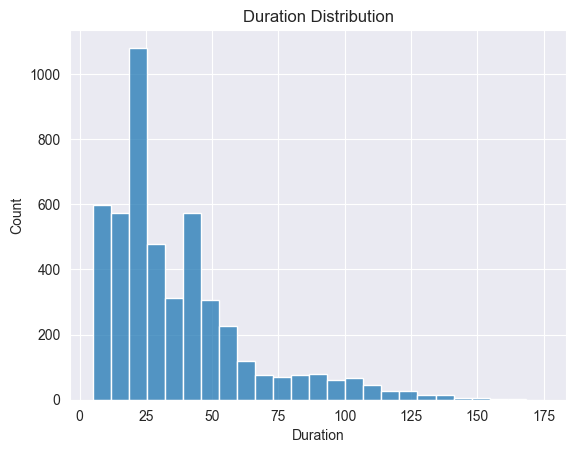

In [153]:
# Visualising distribution of Duration

# Setting seaborn style
sns.set_style('darkgrid')
# Plotting durations as histogram omitting durations <5 minutes (dividing through by TD(min=1) because histplot doesn't accept TD)
sns.histplot((df[df['Duration'] > pd.Timedelta(minutes=5)]['Duration']) / (pd.Timedelta(minutes=1)), bins=25,
             binrange=[5,175])
plt.title('Duration Distribution')

Despite omitting durations <5 minutes, there are still a considerable number of watches between 5-12.5 minutes. The majority of entries are less than 50 minutes which might infer that show episodes are more often watched over films/movies. This is unsurprising given that show episodes are more populous than movies on the Netflix platform. Additionally, the most common duration range is between 18.75-25 minutes.

Let's consider the distribution of durations for each individual profile.

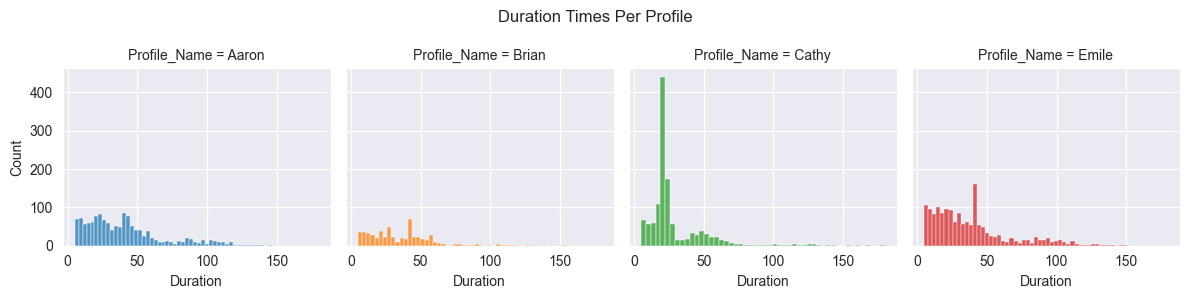

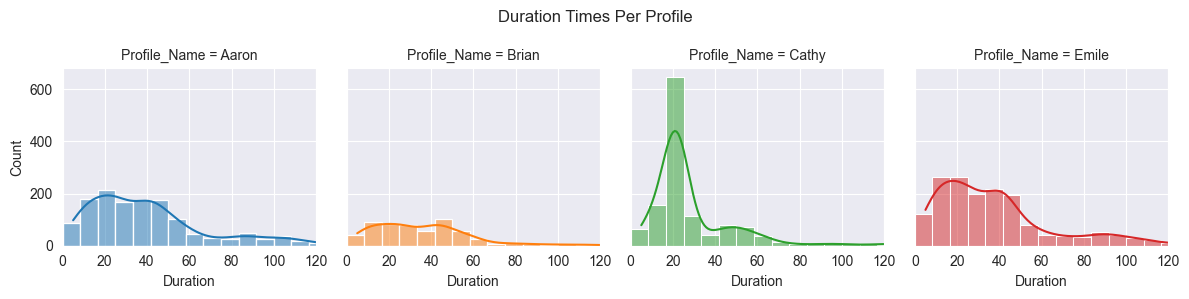

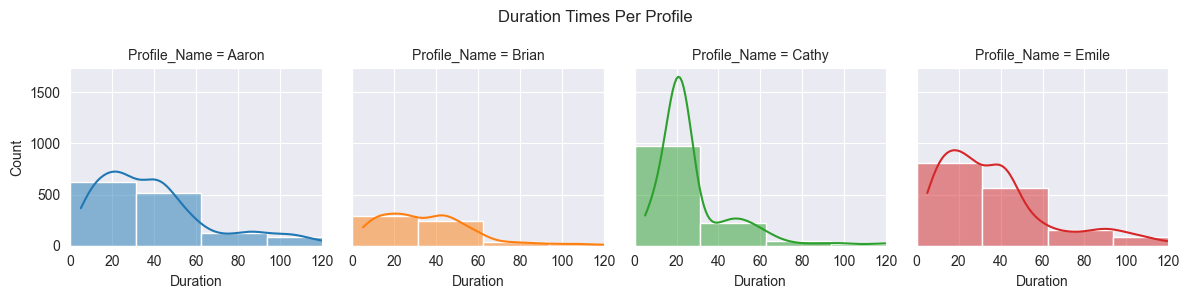

In [154]:
# Visualising distribution of Duration for each profile

# Defining new dataframe to simplify using FacetGrid
df2 = df[df['Duration'] > pd.Timedelta(minutes=5)].copy()
df2['Duration'] = (df2['Duration'] / pd.Timedelta(minutes=1))

# Setting seaborn style
sns.set_style('darkgrid')
# Defining an initial facetgrid
g = sns.FacetGrid(df2, col='Profile_Name', hue='Profile_Name', despine=False)
# Telling facetgrid we want histogram plots of Duration for each profile
g.map(sns.histplot, 'Duration', bins=50)
g.fig.suptitle('Duration Times Per Profile')
plt.tight_layout()

# Redefining facetgrid so that plots are not overlapping (comment out line below for explanation)
g = sns.FacetGrid(df2, col='Profile_Name', hue='Profile_Name', despine=False)
# Telling facetgrid we want histogram plots of Duration for each profile
g.map(sns.histplot, 'Duration', bins=15, binrange=(0, 125), kde=True)
g.fig.suptitle('Duration Times Per Profile')
plt.xlim([0, 120])
plt.tight_layout()

# Redefining facetgrid so that plots are not overlapping (comment out line below for explanation)
g = sns.FacetGrid(df2, col='Profile_Name', hue='Profile_Name', despine=False)
# Telling facetgrid we want histogram plots of Duration for each profile
g.map(sns.histplot, 'Duration', bins=4, binrange=(0, 125), kde=True)
g.fig.suptitle('Duration Times Per Profile')
plt.xlim([0, 120])
plt.tight_layout()

Interestingly, trends across all profiles are similar except in the case of Catherine who seems to primarily watch media around 20 minutes in length. Longer duration watches become decreasingly common with shorter durations being favoured. This may be do to watching more shows than movies or perhaps watching shows/movies in multiple sittings. With all 4 of the profiles there is a sharp drop at 60 minutes, which is usually the longest a series episode would be.

Another option is to consider summary statistics and work out who watches the most Netflix and average watch times.

In [181]:
# Total and average duration times for all users combined

# Defining temporary dataframe to improve readability
dft = df[(df['Duration'] > pd.Timedelta(minutes=5))]

# Printing family summary statistics 
print('{0:<7} Total time watched: {1:} ({2:<3} %)  |  Mean: {3:}  |  Median: {4:}'.format('Family', dft['Duration'].sum(),
     round(dft['Duration'].sum() / (dft['Start_Time'].max() - dft['Start_Time'].min()) * 100 / 4, 2), dft['Duration'].mean().round('s'), 
     dft['Duration'].median().round('s')))

print()

# Total and average duration times for all users individually
for i in df['Profile_Name'].unique():
    # Defining temporary dataframe to improve readability
    dfi = df[(df['Profile_Name'] == i) & (df['Duration'] > pd.Timedelta(minutes=5))]
    # Printing profile summary statistics
    print('{0:<7} Total time watched: {1:}  ({2:<4} %)  |  Mean: {3:}  |  Median: {4:}'.format(i, dfi['Duration'].sum(), 
        round(dfi['Duration'].sum() / (dfi['Start_Time'].max() - dfi['Start_Time'].min()) * 100, 2), dfi['Duration'].mean().round('s'),
         dfi['Duration'].median().round('s')))

Family  Total time watched: 122 days 03:45:16 (0.99 %)  |  Mean: 0 days 00:36:21  |  Median: 0 days 00:27:15

Aaron   Total time watched: 38 days 11:36:44  (1.25 %)  |  Mean: 0 days 00:40:39  |  Median: 0 days 00:35:21
Brian   Total time watched: 14 days 09:38:15  (0.48 %)  |  Mean: 0 days 00:36:00  |  Median: 0 days 00:31:46
Cathy   Total time watched: 26 days 06:59:41  (0.9  %)  |  Mean: 0 days 00:29:35  |  Median: 0 days 00:21:44
Emile   Total time watched: 42 days 23:30:36  (1.4  %)  |  Mean: 0 days 00:38:11  |  Median: 0 days 00:31:25


As expected, Emile has the highest total watch time (having had the densist histogram) closely followed by Aaron. Emile and Aaron also had similar average mean durations at 38 and 40 minutes, respectively. Brian has the lowest watch time by far, being nearly a third of Emile's watch time. Cathy's mean duration was the lowest and is likely skewed by their concentration of ~20 minute entries (reflected by a median of 21 minutes). The similarities in mean and median between Aaron, Brian and Emile suggest similar watching habits obviously in varied amounts. 

From the initial entry (2015) to the latest (2023) the family has spent around 122 days or ~1% of their total time watching Netflix. This translates to Aaron, Brian, Cathy and Emile having spent 1.25%, 0.48%, 0.9% and 1.4% of their time watching Netflix, respectively.

Moving away from Duration, consider Start_Time and manipulation of its datatime format.

### Start_Time

In [13]:
df['Weekday'] = df['Start_Time'].dt.weekday
df['Hour'] = df['Start_Time'].dt.hour
df.head()
print(df.dtypes)

Profile_Name                            object
Start_Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental_Video_Type                 object
Device_Type                             object
Bookmark                       timedelta64[ns]
Latest_Bookmark                timedelta64[ns]
Country                                 object
Weekday                                  int64
Hour                                     int64
dtype: object


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Monday'),
  Text(1.5, 0, 'Tuesday'),
  Text(2.5, 0, 'Wednesday'),
  Text(3.5, 0, 'Thursday'),
  Text(4.5, 0, 'Friday'),
  Text(5.5, 0, 'Saturday'),
  Text(6.5, 0, 'Sunday')])

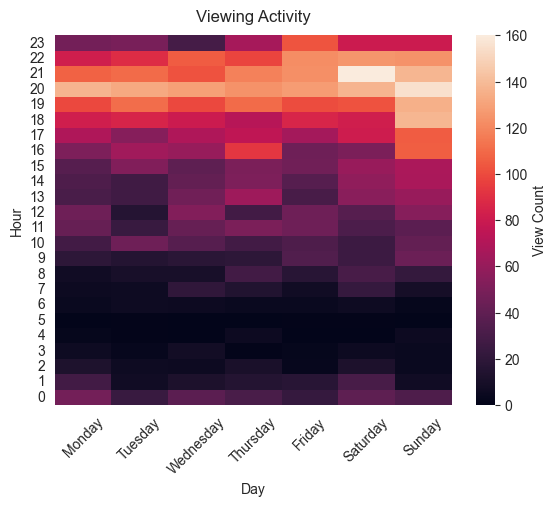

In [14]:
M = np.zeros((df['Hour'].nunique(),df['Weekday'].nunique()))
for i in sorted(df['Hour'].unique()):
    for j in sorted(df['Weekday'].unique()):
        M[i,j] = ((df[df['Hour'] == i]['Weekday'] == j).sum())


sns.set_style('darkgrid')
sns.heatmap(M, xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                             cbar_kws={'label': 'View Count'}).invert_yaxis()
plt.xlabel('Day'); plt.ylabel('Hour'); plt.title('Viewing Activity', pad=10)
plt.xticks(rotation=45)

### Device_Type

C:\Users\Tynan\AppData\Local\Temp\ipykernel_16108\3496533719.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(map(f, ax.get_xticklabels()))


[Text(0, 0, 'Youview_Br\nitish_Tele\ncom_DTR-\nT2100_Set_\nTop_Box'),
 Text(1, 0, 'Netflix_Op\nera_Other'),
 Text(2, 0, 'Netflix_Ch\nrome_MAC_(\nCadmium)_H\nTML_5'),
 Text(3, 0, 'Safari_MAC\n_(Cadmium)'),
 Text(4, 0, 'Chrome_PC_\n(Cadmium)')]

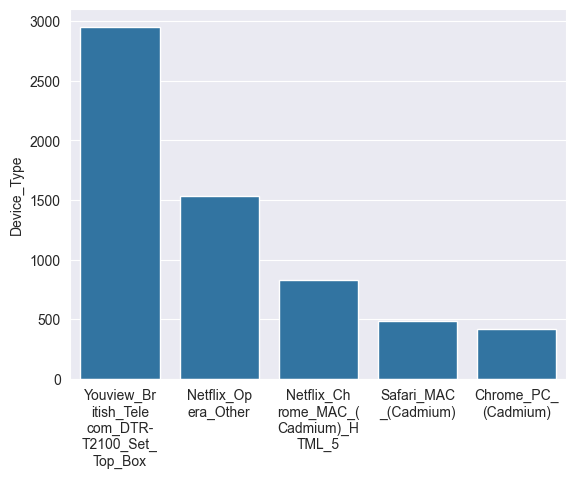

In [53]:
import textwrap

f = lambda x: textwrap.fill(x.get_text(), 10)

ax = sns.barplot(df['Device_Type'].value_counts()[:5])
ax.set_xticklabels(map(f, ax.get_xticklabels()))

In [54]:
df['Device_Type'].unique()

array(['Youview_British_Telecom_DTR-T2100_Set_Top_Box',
       'iPhone_12_Pro_Max', 'Apple_iPhone_8_Plus_(GSM)',
       'Netflix_iPhone-Safari_iPhone',
       'Netflix_Chrome_MAC_(Cadmium)_HTML_5', 'Apple_iPhone_11',
       'Safari_MAC_(Cadmium)', 'Apple_iPhone_7_(GSM)',
       'Apple_iPhone_7_Plus_(GSM)', 'iPhone_SE',
       'TiVo_Virgin_Media_Samsung_DVR_Set_Top_Box', 'iPhone_5S_CDMA',
       'LG_LG_2017_MStar_M2R_Standard_DTV_Smart_TV',
       'Netflix_Opera_Other', 'Chrome_PC_(Cadmium)',
       'Apple_iPad_5th_Gen_(Wi-Fi)_iPad', 'Sony_PS5', 'Apple_iPad_mini',
       'Sony_PS4', 'Apple_iPhone_6s',
       'Netflix_Windows_App_-_Cadmium_Windows_Mobile',
       'Microsoft_Xbox_One',
       'Amazon_Fire_TV_Stick_2020_+_Streaming_Stick', 'Apple_iPhone_13',
       'Vestel_ODM_4.3_Nova_2K_TV_Smart_TV', 'Microsoft_Xbox_360',
       'Samsung_CE_2020_Kant-S2_DTV_Smart_TV',
       'LG_2016_MStar_M2_Standard_DTV_Smart_TV', 'Windows_8_x64_devices',
       'iPhone_5C_Global', 'Internet_Explorer_(

15 6 5 5


C:\Users\Tynan\AppData\Local\Temp\ipykernel_16108\3703002258.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot([len(apple), len(microsoft), len(tv), len(other)]).set_xticklabels(['Apple', 'Microsoft', 'TV', 'Other'])


Text(0.5, 1.0, 'Types of Devices')

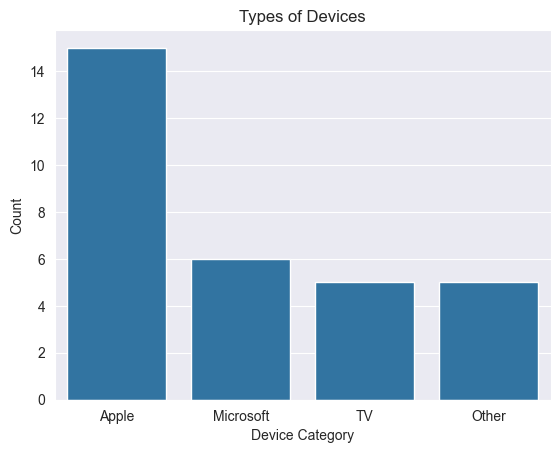

In [79]:
apple = []
microsoft = []
tv = []
other = []

for i in df['Device_Type'].unique():
    if i.__contains__('MAC') | i.__contains__('iPhone') | i.__contains__('Apple') :
        apple.append(i)
    elif i.__contains__('Windows') | i.__contains__('Microsoft') | i.__contains__('Xbox') | i.__contains__('PC') | i.__contains__('Internet_Explorer'):
        microsoft.append(i)
    elif i.__contains__('TV'):
        tv.append(i)
    else:
        other.append(i)

print(len(apple), len(microsoft), len(tv), len(other))

sns.barplot([len(apple), len(microsoft), len(tv), len(other)]).set_xticklabels(['Apple', 'Microsoft', 'TV', 'Other'])
plt.xlabel('Device Category'); plt.ylabel('Count'); plt.title('Types of Devices')


C:\Users\Tynan\AppData\Local\Temp\ipykernel_16108\3352513608.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(device_total).set_xticklabels(['Apple', 'Microsoft', 'TV', 'Other'])


Text(0.5, 1.0, 'Types of Devices')

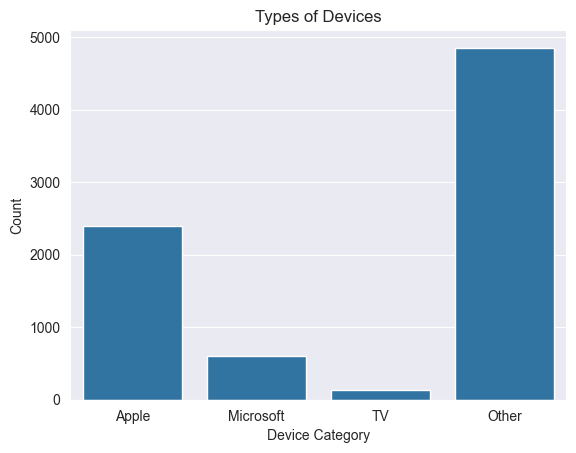

In [135]:
device_type = [apple, microsoft, tv, other]

device_total = np.zeros(4)

for i, k in enumerate(device_type):
    for j in k:
        device_total[i] = device_total[i] + df['Device_Type'].value_counts().to_dict()[j]

sns.barplot(device_total).set_xticklabels(['Apple', 'Microsoft', 'TV', 'Other'])
plt.xlabel('Device Category'); plt.ylabel('Count'); plt.title('Types of Devices')

In [118]:
test = df['Device_Type'].value_counts().to_dict()


1536

### Feature Engineering

- Determine whether an entry is a **movie** or a **show** using Duration & Bookmark 

Generally speaking, movies are longer than show episodes and episodes are usually less than 60-70 minutes. Using the upper bound of this range we can classify an entry as being a movie if the Duration and/or Bookmark > 70 minutes

0    7066
1     929
Name: Movie, dtype: int64

0    0.883802
1    0.116198
Name: Movie, dtype: float64


Text(0.5, 1.0, 'Movie or Not?')

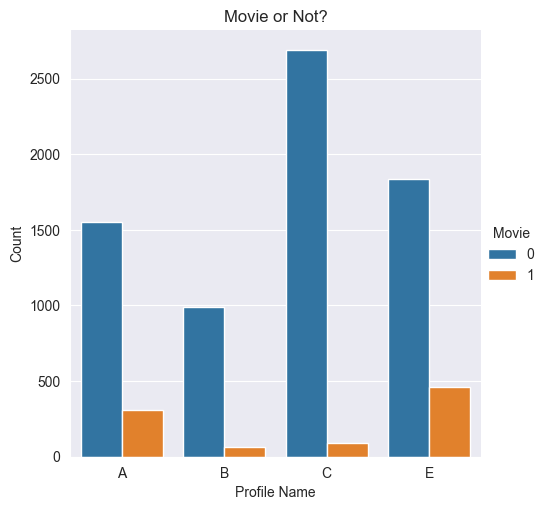

In [68]:
# Creating categorical Movie series 
df['Movie'] = ((df['Duration'] > pd.Timedelta(minutes=70)) | (df['Bookmark'] > pd.Timedelta(minutes=70))).astype(int)

# Printing estimated number of movie and non-movie entries
print(df['Movie'].value_counts()); print()
print(df['Movie'].value_counts(normalize=True))

# Visualising the results across profiles
sns.set_style('darkgrid')
g = sns.catplot(df, x='Profile_Name', hue='Movie', kind='count')
g.set_xlabels('Profile Name'); g.set_ylabels('Count'); plt.title('Movie or Not?')